# Module 3: Machine Learning

## Sprint 2: Gradient Boosted Trees & Feature Engineering

## Part 5: Stroke Prediction Dataset


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will train and deploy a machine learning model on the Stroke Prediction Dataset.
You will have to apply all that you have learned about training and deploying machine learning models to complete this task.
Our expectation is that you'll use your own judgment on how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills, and there will be many projects for you to apply your newly gained skills in the future.
For now, just use what you have learned and try your best!

## Context

Imagine that you are a data analyst working for The Johns Hopkins Hospital.
Your team is asked to create a machine learning model, which could predict if the patient is likely to get a stroke - being able to determine which patients have high stroke risk will allow your doctors to advise them and their families on how to act in case of an emergency.

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.

## Requirements

- Download the data from [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, and checking for correlations and other relations between variables and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, and conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the "stroke" column using all other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. Suggestion: you might want to investigate how to use (scikit-learn pipelines)[https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html] to make your training pipelines more robust.
- Deploy the machine learning model. Choose the best performing model and deploy it. You are free to choose any deployment option that you like - you can deploy your model in a container (on your computer or on a server), do a serverless deployment on the cloud, or even deploy and serve it on the browser as a web app.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface, or did you explore the dataset in-depth?
- Model's performance. How well did your model perform the predictions?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research. 
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What is wrong with preprocessing data before we run a hyperparameter search algorithm (e.g., randomized search) with cross-validation?
- What are the typical model deployment patterns? What are their advantages and disadvantages?
- How do hidden feedback loops affect machine learning models? Can you give an example of a hidden feedback loop?


# Stroke prediction

The aim for this project is to predict whether or not a person might have a risk of getting a stroke using the Stroke Prediction Dataset from Kaggle.

Attribute Information

- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## EDA

In [1]:
try:
  import matplotlib
  assert matplotlib.__version__=='3.4.0'
except AssertionError:
  !pip install matplotlib==3.4.0
  !pip install eli5
  !pip install catboost
  !pip install boruta
  !pip install shap
  !pip install optuna

  import os
  os.kill(os.getpid(), 9)

In [2]:
!gdown 12Qq-FIFaHnXsi9hohSl_TuveIPHzzs7Q

Downloading...
From: https://drive.google.com/uc?id=12Qq-FIFaHnXsi9hohSl_TuveIPHzzs7Q
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 126MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
original_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are some null values in the BMI column.

In [5]:
original_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
original_df.duplicated().any()

False

In [7]:
original_df.id.nunique()

5110

We can see that all IDs are unique, so that means all patients in the dataset are unique.

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    original_df, 
    test_size=0.2, 
    random_state=0, 
    stratify=original_df.stroke
)

In [9]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3928.000000,4088.000000
mean,36621.427838,43.257642,0.098337,0.053082,105.820949,28.860820,0.048679
std,21049.446294,22.769261,0.297806,0.224225,44.809282,7.898843,0.215223
min,77.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17977.250000,25.000000,0.000000,0.000000,77.365000,23.500000,0.000000
50%,36915.500000,45.000000,0.000000,0.000000,91.750000,28.000000,0.000000
75%,54625.750000,61.000000,0.000000,0.000000,113.855000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


Plotting helper function definitions.

In [10]:
from math import ceil
from typing import Optional, Callable

def with_hue(
    ax: plt.Axes,
    x_data: pd.Series,
    n_x_cat: int,
    n_hue_cat: int
  ) -> None:
  """Annotate bars with percentages with respect to hue categories"""

  a = [p.get_height() for p in ax.patches]

  patches = [p for p in ax.patches]

  for i in range(n_x_cat):
    total = x_data.value_counts().values[i]

    for j in range(n_hue_cat):
      p_idx = j*n_x_cat+i

      percentage = '{:.1f}%'.format(100*a[p_idx]/total)

      x = patches[p_idx].get_x() + patches[p_idx].get_width() / 2

      y = patches[p_idx].get_height()

      ax.annotate(
          percentage,
          (x, y),
          ha='center',
          va='center',
          xytext=(0, 5),
          textcoords='offset points',
          size=9
      )


def without_hue(
    ax: plt.Axes,
    x_data: pd.Series
  ) -> None:
  """Annotate bars with percentages with respect to x categories"""

  total = len(x_data)

  for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)

    x = p.get_x() + p.get_width() / 2

    y = p.get_height()

    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        size=10
    )


def plot_barplots(
    df: pd.DataFrame,
    feature_names: list, 
    plot_func: Callable,
    plot_on_x: Optional[bool]=True,
    plot_hue: Optional[str]=None,
    n_rows: Optional[int]=None, 
    n_cols: Optional[int]=None, 
    size: Optional[tuple]=(20,10),
    kwargs: Optional[dict]={},
    show_percentage: Optional[bool]=True
  ) -> None:
  if n_rows is None or n_cols is None:
    n_rows = ceil(len(cat_features)/4)
    n_cols = 4

  fig, ax = plt.subplots(n_rows, n_cols, figsize=size)

  curr_plot = 0

  feature_names = list(feature_names)

  if plot_hue is not None and plot_hue in feature_names:
    feature_names.remove(plot_hue)

  for i in range(n_rows):
    for j in range(n_cols):
      if curr_plot==len(feature_names):
        fig.delaxes(ax[i][j])
        continue

      bar_order = df[feature_names[curr_plot]].value_counts(
          ascending=False).index

      if show_percentage:
        if plot_on_x:
          plot_func(
              data=df,
              x=feature_names[curr_plot],
              hue=plot_hue,
              ax=ax[i][j],
              order=bar_order,
              **kwargs
          )
        else:
          plot_func(
              data=df,
              y=feature_names[curr_plot],
              hue=plot_hue,
              ax=ax[i][j],
              order=bar_order,
              **kwargs
          )

        if plot_hue is not None:
          with_hue(
              ax[i][j],
              df[feature_names[curr_plot]],
              df[feature_names[curr_plot]].nunique(),
              df[plot_hue].nunique()
          )
        else:
          without_hue(
              ax[i][j],
              df[feature_names[curr_plot]]
          )

      else:
        if plot_on_x:
          plot_func(
              data=df,
              x=feature_names[curr_plot],
              hue=plot_hue,
              ax=ax[i][j],
              order=bar_order,
              **kwargs
          )
        else:
          plot_func(
              data=df,
              y=feature_names[curr_plot],
              hue=plot_hue,
              ax=ax[i][j],
              order=bar_order,
              **kwargs
          )

      curr_plot += 1

  plt.tight_layout()


def plot_subplots(
    df: pd.DataFrame,
    feature_names: list, 
    plot_func: Callable,
    plot_on_x: Optional[bool]=True,
    plot_hue: Optional[str]=None,
    n_rows: Optional[int]=None, 
    n_cols: Optional[int]=None, 
    size: Optional[tuple]=(20,10),
    kwargs: Optional[dict]={}
  ) -> None:
  if n_rows is None or n_cols is None:
    n_rows = ceil(len(cat_features)/4)
    n_cols = 4

  fig, ax = plt.subplots(n_rows, n_cols, figsize=size)

  curr_plot = 0

  feature_names = list(feature_names)

  if plot_hue is not None and plot_hue in feature_names:
    feature_names.remove(plot_hue)

  for i in range(n_rows):
    for j in range(n_cols):
      if curr_plot==len(feature_names):
        fig.delaxes(ax[i][j])
        continue

      if plot_on_x:
        plot_func(
            data=df,
            x=feature_names[curr_plot],
            hue=plot_hue,
            ax=ax[i][j],
            **kwargs
        )
      else:
        plot_func(
            data=df,
            y=feature_names[curr_plot],
            hue=plot_hue,
            ax=ax[i][j],
            **kwargs
        )

      curr_plot += 1

  plt.tight_layout()

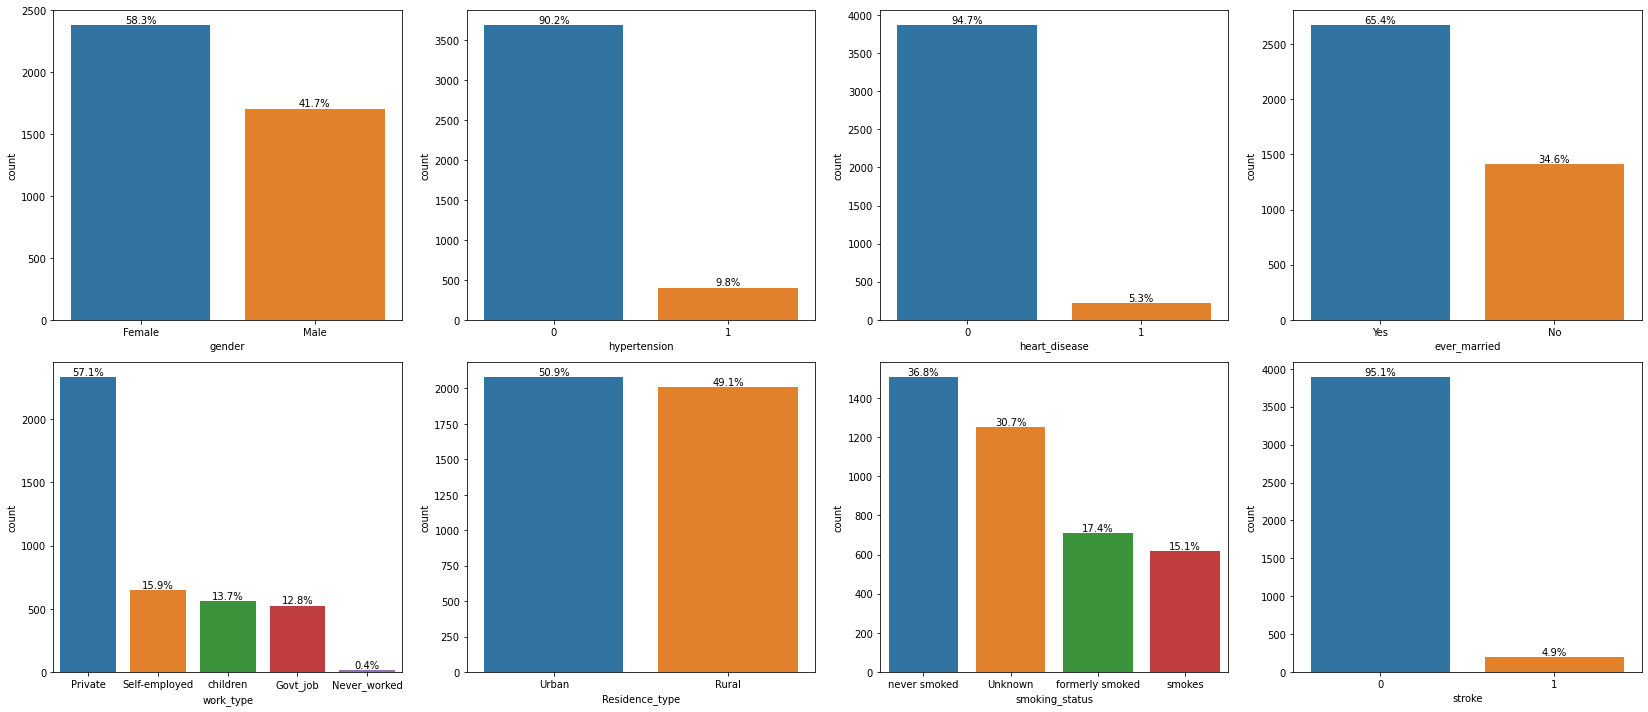

In [11]:
cat_features = train_df.drop(columns='id').select_dtypes(
    exclude='float64').columns

plot_barplots(
    train_df,
    cat_features, 
    sns.countplot, 
    n_rows=None, 
    n_cols=None, 
    size=(23,10),
    plot_on_x=True,
    show_percentage=True
)

Observations:
- There are more females in the dataset (58,3%).
- A lot of categorical features are inbalanced, because they represent more rare things like hypertension, heart disease or stroke.
- 65,4% of people are married.
- 57,1% of people are identified as having a private work type.
- The amount of people living in urban and rural residence type are almost equaly distributed.
- 36,8% of people never smoked, but there are 30,7% of people of which the smoking status is unknown.

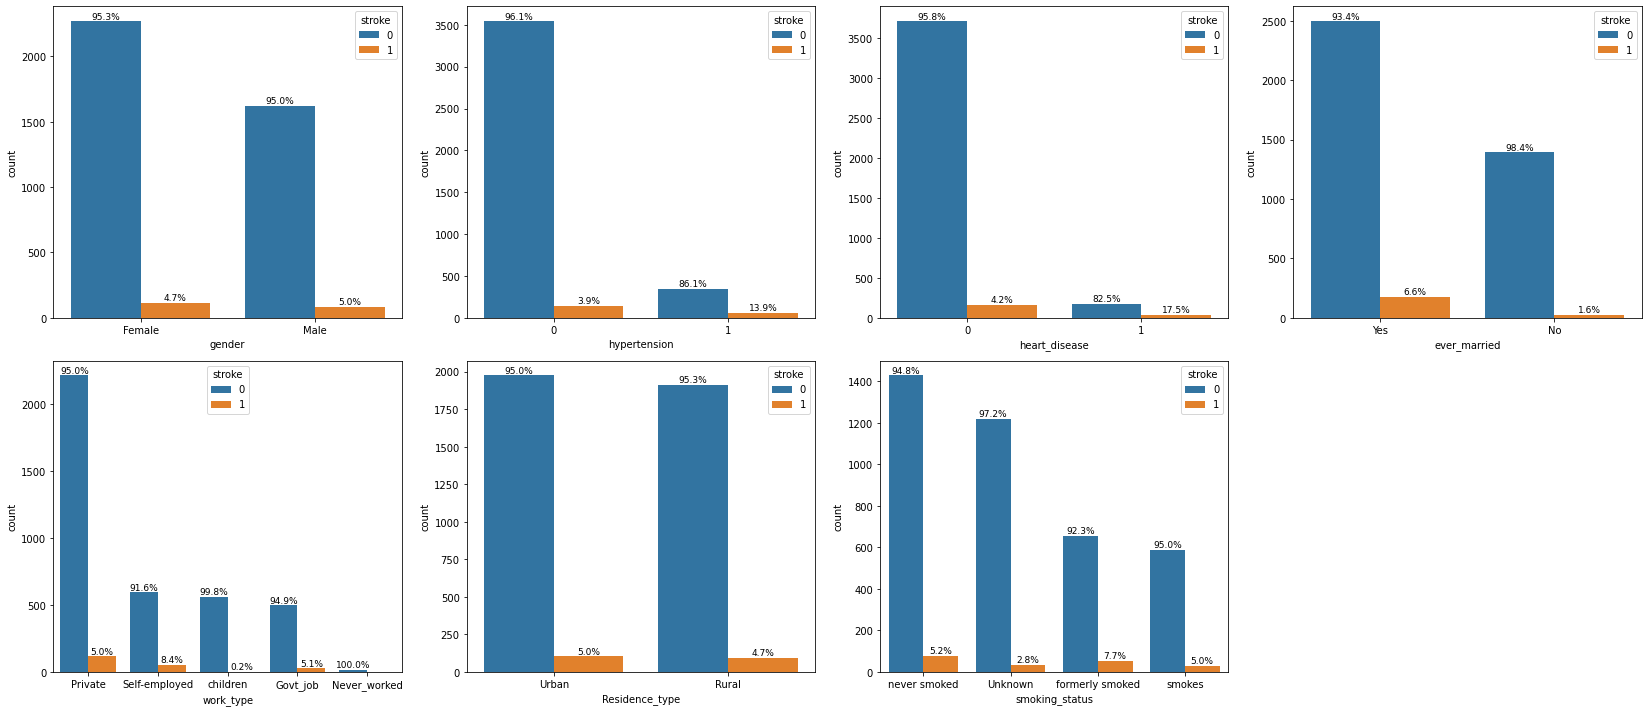

In [12]:
plot_barplots(
    train_df,
    cat_features, 
    sns.countplot, 
    n_rows=None, 
    n_cols=None, 
    size=(23,10),
    plot_on_x=True,
    plot_hue='stroke',
    show_percentage=True
)

Observations:
- It doesn't seem like there is a difference in stroke rates between males and females.
- There is a higher percentage of strokes in people who have hypertension.
- There is a higher percentage of strokes in people who have heart disease.
- There is a higher percentage of strokes in people who are married.
- It might seem that the number of strokes is higher for people who are self-employed.
- It doesn't seem like there is a difference in stroke rates between people who live in urban and rural places.
- People who smoked have a slightly higher percentage in stroke rates.

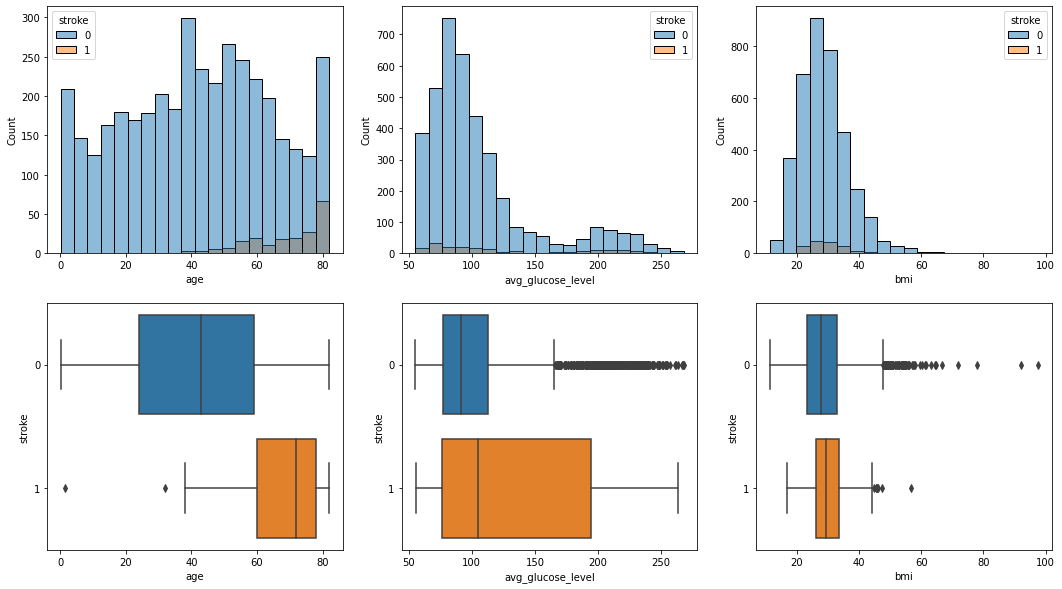

In [13]:
num_features = train_df.select_dtypes(include='float64').columns

ncols = len(num_features)
fig, ax = plt.subplots(2, ncols, figsize=(18,10))

for i in range(ncols):
  sns.histplot(
      data=train_df,
      x=num_features[i],
      hue='stroke',
      bins=20,
      ax=ax[0][i]
  )
  sns.boxplot(
      data=train_df,
      x=num_features[i],
      y='stroke',
      orient='h',
      ax=ax[1][i]
  )

Observations:
- Most stroke cases are concentrated towards the older age as expected, but there are a few outliers like what seem to be an infant and someone in their 30s.
- People with higher glucose level seem to have higher risk of getting a stroke. Also, there might be some kind of threshold between 150-200 that distinguishes low and high glucose level, because it seems it is not common for people to have that glucose level.
- It doesn't seem like there is much difference in terms of BMI, but the stroke rate is slightly higher as BMI increases.

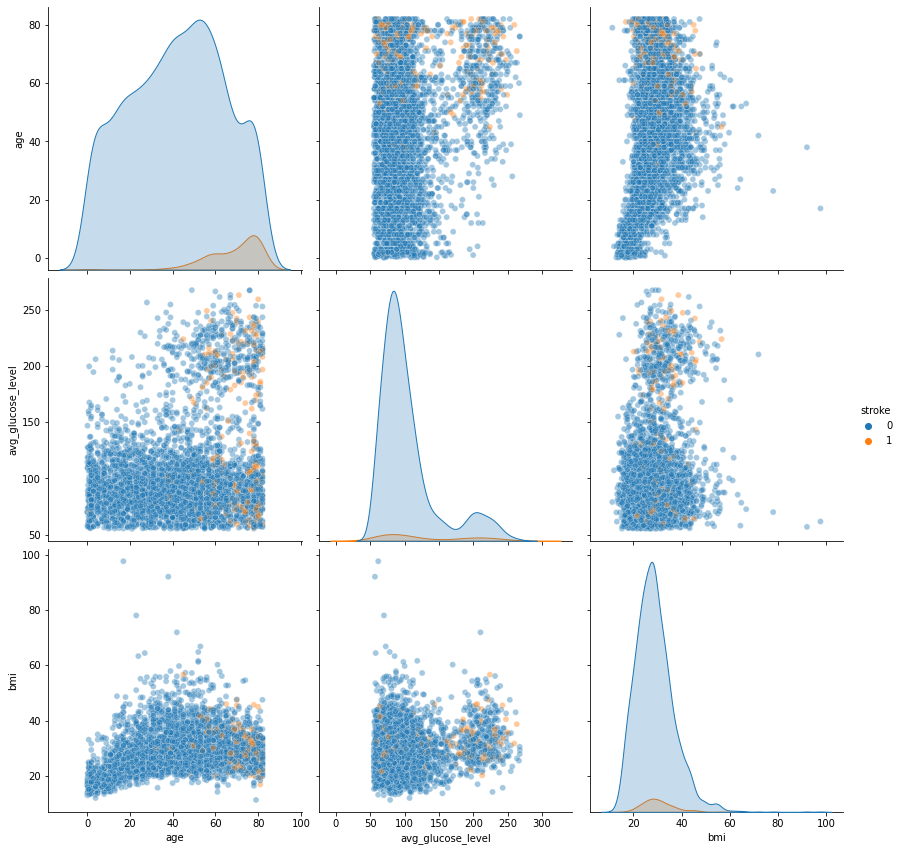

In [14]:
sns.pairplot(
    data=train_df[[*num_features,'stroke']],
    hue='stroke',
    plot_kws={'alpha':0.4},
    height=4
)

plt.show()

Observations:
- There doesn't seem to be an obvious linear separation in terms of strokes, but we do see as earlier that older age and higher glucose level contribute to increased risk of strokes.
- We do see other correlations and not exactly linear ones. There seems to be a non linear correlation between age and BMI. BMI stops increasing after a certain age.
- We can also see more cases of increased glucose level at an older age.

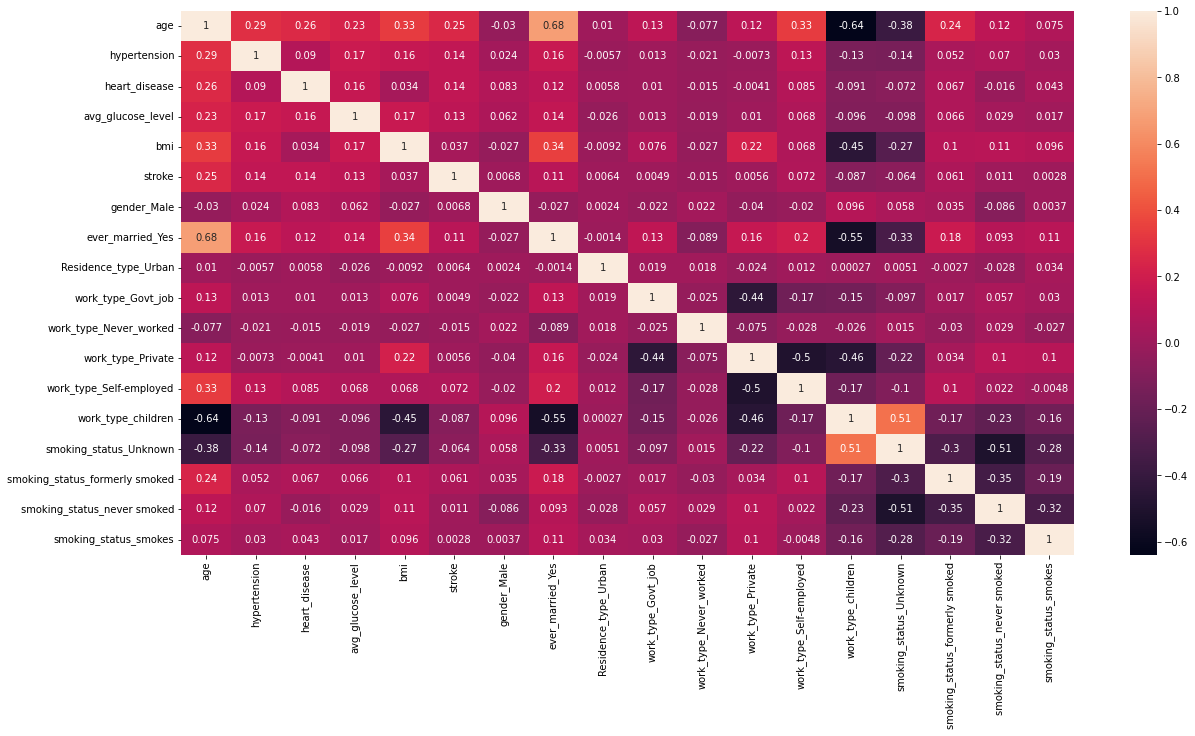

In [15]:
plt.figure(figsize=(20,10))

df = pd.get_dummies(
    train_df, 
    drop_first=True, 
    columns=['gender','ever_married','Residence_type']
)

sns.heatmap(
    data=pd.get_dummies(df).drop(columns='id').corr(),
    annot=True
)

plt.show()

Observations:
- In terms of the stroke feature the most significant correlations are with age, hypertension, heart disease, average glucose level and marital status, also all of them are positive.
- There is a significant positive correlation between marital status and age which makes sense.
- Other high correlations seem to be mostly between binary variables of a particular category like work type and smoking status. But there are a few interesting ones like work type children is negatively correlated with age, BMI and marital status. Also, BMI is positvely correlated with marital status.

The following contingency table shows frequencies of different categorical combinations in terms of people that had strokes.

In [16]:
df = train_df[train_df['stroke']==1]
pd.crosstab(
    [df['stroke'],
     df['work_type'],
     df['smoking_status']],
    [df['gender'],
     df['hypertension'],
     df['heart_disease'],
     df['ever_married']],
).style.background_gradient(axis=None, cmap='cividis')

Observations:
- In terms of females that had strokes the most common combination among these categorical variables is:
  - work_type - Private;
  - smoking_status - never smoked;
  - hypertension - 0;
  - heart_disease - 0;
  - ever_married - Yes;
- In terms of males that had strokes the most common combination among these categorical variables is:
  - work_type - Private;
  - smoking_status - formerly smoked;
  - hypertension - 0;
  - heart_disease - 0;
  - ever_married - Yes;

**Statistical testing**

Let's see if there is any statistical difference in stroke rates between females and males and between married and single people.

- H<sub>0</sub>: there is no difference in proportions of stroke and no stroke groups in terms of a certain binary feature (p - p = 0);
- H<sub>a</sub>: there is a difference in proportions of stroke and no stroke groups in terms of a certain binary feature (p - p >< 0);

Significance level - 95%

In [17]:
stroke_df = pd.get_dummies(
    train_df[train_df['stroke']==1][['gender', 'ever_married']], 
    drop_first=True
)

no_stroke_df = pd.get_dummies(
    train_df[train_df['stroke']==0][['gender', 'ever_married']], 
    drop_first=True
)

In [18]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

for col in stroke_df.columns:

  group1 = stroke_df[col]

  group2 = no_stroke_df[col].sample(stroke_df.shape[0],random_state=0)

  n_successes = np.array([group1.sum(), group2.sum()])

  sample_sizes = np.array([group1.shape[0], group2.shape[0]])

  zstat, pvalue = proportions_ztest(
      count=n_successes,
      nobs=sample_sizes,
      alternative='two-sided'
  )

  print('-'*150)

  print(f'Proportion test results of feature {col}:\n')

  print(f'zstat: {zstat:.4f}, pvalue: {pvalue:.4f}\n')

  if pvalue > alpha:
    print(f'P value is more than alpha {alpha},'
    +' so we fail to reject the null hypothesis')
  else:
    print(f'P value is less than alpha {alpha}, so we can reject the null'
    +' hypothesis and suggest the alternative hypothesis is true')

  print('-'*150+'\n\n')

------------------------------------------------------------------------------------------------------------------------------------------------------
Proportion test results of feature gender_Male:

zstat: 0.8147, pvalue: 0.4152

P value is more than alpha 0.05, so we fail to reject the null hypothesis
------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------
Proportion test results of feature ever_married_Yes:

zstat: 5.3711, pvalue: 0.0000

P value is less than alpha 0.05, so we can reject the null hypothesis and suggest the alternative hypothesis is true
------------------------------------------------------------------------------------------------------------------------------------------------------




We see that the result for gender doesn't seem to be significant. However, there is a significant difference in stroke rates between married and single people. So based on the earlier barplot it does seem that married people are more likely to get a stroke.

## Data preprocessing

We can now create our data preprocessing pipeline, which will take care of things like imputation, scaling, encoding. Later we can establish a baseline by using some ML models, upon which we can improve later on by doing feature engineering.

It is worth noting that the most important metric in this case would be recall, because it is important to identify as many patients that have a high risk of a stroke as possible.

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


features = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
            'smoking_status']

num_features = ['age', 'avg_glucose_level', 'bmi']

num_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("num_imputer", SimpleImputer(add_indicator=True))
    ]
)


cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                'work_type', 'Residence_type', 'smoking_status']

cat_transformer = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent",
                                      missing_values='Unknown',
                                      add_indicator=True)),
        ("oh_encoder", OneHotEncoder(drop='if_binary', 
                                     handle_unknown="ignore"))
    ]
)


col_trans = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

X_train = train_df[features]
y_train = train_df.stroke

_ = col_trans.fit(X_train)

Cross validation for multiple models helper function definition.

In [20]:
from collections import defaultdict
from sklearn.model_selection import cross_validate

def test_models(
    models,
    X_train,
    y_train,
    metrics,
    preprocessor=None,
    cv_folds=5,
    n_jobs=-1
  ) -> pd.DataFrame:
  results_dict = defaultdict(list)

  for clf in models:
    if preprocessor is not None:
      clf_pl = Pipeline(steps=[('preproc', preprocessor), ('clf', clf)])
    else:
      clf_pl = clf

    result = cross_validate(
        clf_pl,
        X_train,
        y_train,
        cv=cv_folds,
        scoring=metrics,
        n_jobs=n_jobs
    )

    results_dict['model_name'].append(clf.__class__.__name__)

    for metric in metrics:
      results_dict[f'mean_{metric}'].append(
          result[f'test_{metric}'].mean().round(3))
      results_dict[f'std_{metric}'].append(
          result[f'test_{metric}'].std().round(3))

  return pd.DataFrame(results_dict)

Testing models with default parameters and current data pipeline.

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

y_weight = y_train[y_train==0].shape[0]/y_train[y_train==1].shape[0]

xbg_clf = XGBClassifier(
    random_state=0,
    scale_pos_weight=y_weight
)

lgbm_clf = LGBMClassifier(
    random_state=0,
    scale_pos_weight=y_weight
)

cb_clf = CatBoostClassifier(
    random_state=0,
    scale_pos_weight=y_weight,
    verbose=0
)

d_clf = DummyClassifier(strategy='uniform', random_state=0)

log_clf = LogisticRegression(class_weight='balanced', random_state=0)

metrics = ['f1', 'recall', 'precision', 'roc_auc', 'neg_log_loss']

test_models(
    models=[d_clf, log_clf, xbg_clf, lgbm_clf, cb_clf],
    preprocessor=col_trans,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,DummyClassifier,0.088,0.010,0.523,0.065,0.048,0.006,0.500,0.000,-0.693,0.000
1,LogisticRegression,0.241,0.027,0.799,0.092,0.142,0.016,0.855,0.025,-0.480,0.025
2,XGBClassifier,0.246,0.022,0.699,0.089,0.149,0.014,0.838,0.023,-0.384,0.017
3,LGBMClassifier,0.230,0.056,0.282,0.082,0.197,0.044,0.819,0.032,-0.236,0.021
4,CatBoostClassifier,0.237,0.049,0.352,0.085,0.179,0.036,0.809,0.029,-0.249,0.014


Here we see our initial metric results. We can see that logistic regression and other models do perform better than the dummy classifier which outputs random values.

In [22]:
import eli5

clf_pl = Pipeline(steps=[('preproc', col_trans), ('clf', log_clf)])
clf_pl.fit(X_train, y_train)

cat_features_preproc = clf_pl.named_steps['preproc']\
.named_transformers_['cat']\
.named_steps['oh_encoder']\
.get_feature_names_out([*cat_features, 'smoking_status_imputed'])

all_features = np.concatenate(
    [num_features, ['bmi_imputed'], cat_features_preproc])

eli5.show_weights(clf_pl.named_steps['clf'], feature_names=all_features)

Weight?,Feature
+1.827,age
+1.658,bmi_imputed
+0.977,work_type_children
+0.531,hypertension_1
+0.445,heart_disease_1
+0.220,smoking_status_smokes
+0.165,avg_glucose_level
+0.093,ever_married_Yes
+0.091,bmi
+0.007,Residence_type_Urban


With eli5 library we can see feature importances with models like logistic regression and decision trees. From the weights table we can see the importance of every feature. Age and BMI imputed have a strong positive relationship with the stroke variable. Work type self-employed has a negative relationship with stroke. It is interesting that a variable that represents patients whose BMI data is missing is so important for prediction. Let's see how many, out of those who had their BMI data missing, had strokes in the dataset.

In [23]:
n_missing_bmi = train_df['bmi'].isna().sum()

n_missing_bmi_with_stroke = train_df[train_df['bmi'].isna()].stroke.sum()

100 * n_missing_bmi_with_stroke / n_missing_bmi

20.0

20% of patients whose BMI data is missing had strokes, so that is quite high. There might be something special about missing BMI data in terms of strokes.

## Feature engineering and selection

Now we will update our preprocessing pipeline to add transformed features. The transformed features will be log of glucose level and BMI, also discretized age into 3 bins.

In [24]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from sklearn.preprocessing import OneHotEncoder, StandardScaler, \
PolynomialFeatures, FunctionTransformer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from mlxtend.feature_selection import ColumnSelector


features = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
            'smoking_status']

num_features = ['age', 'avg_glucose_level', 'bmi']

num_tf = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(add_indicator=True)),
        ('feat_eng', FeatureUnion([
            ('kbins_desc', Pipeline(
                steps=[
                    ("col_sel", ColumnSelector(cols=[0])),
                    ("kbins", KBinsDiscretizer(n_bins=3, 
                                               encode='ordinal', 
                                               strategy='uniform')),
                    ("std", StandardScaler()),
                ]
            )),
            ('log', Pipeline(
                steps=[
                    ("col_sel", ColumnSelector(cols=[1,2])),
                    ("log_tr", FunctionTransformer(np.log)),
                    ("std", StandardScaler()),
                ]
            )),
            ('imp_indicator_3', ColumnSelector(cols=[3]))]
        ))
    ]
)


cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                'work_type', 'Residence_type', 'smoking_status']

cat_tf = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent",
                                      missing_values='Unknown',
                                      add_indicator=True)),
        ("oh_encoder", OneHotEncoder(drop='if_binary',
                                     handle_unknown="ignore"))
    ]
)


col_trans = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_features),
        ("cat", cat_tf, cat_features),
    ]
)

X_train = train_df[features]
y_train = train_df.stroke

_ = col_trans.fit(X_train)

We will use Boruta for feature selection and see which are the most useful features after performing the preprocessing.

In [25]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, 
                             n_jobs=-1, 
                             max_depth=5, 
                             class_weight='balanced',
                             random_state=0)

bor_sel = BorutaPy(clf, random_state=0, verbose=0)
_ = bor_sel.fit_transform(col_trans.transform(X_train), y_train.values)

df = pd.DataFrame(col_trans.transform(X_train), columns=all_features)
bor_sel_cols = df[df.columns[bor_sel.support_]].columns
bor_sel_cols

Index(['age', 'avg_glucose_level', 'bmi', 'bmi_imputed', 'hypertension_1',
       'ever_married_Yes'],
      dtype='object')

So these are the selected features by Boruta algorithm. Let's compare the performance of models with and without the less important features.

In [26]:
test_models(
    models=[log_clf, xbg_clf, lgbm_clf, cb_clf],
    preprocessor=col_trans,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10,
    n_jobs=None
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,LogisticRegression,0.210,0.015,0.869,0.075,0.120,0.009,0.833,0.037,-0.501,0.032
1,XGBClassifier,0.224,0.023,0.708,0.106,0.134,0.013,0.825,0.037,-0.410,0.023
2,LGBMClassifier,0.218,0.066,0.292,0.090,0.174,0.052,0.793,0.034,-0.252,0.029
3,CatBoostClassifier,0.236,0.058,0.392,0.095,0.170,0.042,0.801,0.034,-0.273,0.018


In [27]:
preproc = Pipeline(
    steps=[
        ("col_trans", col_trans),
        ("boruta_selected", ColumnSelector(
            cols=np.where(bor_sel.support_==1)[0]))
    ]
)

_ = preproc.fit(X_train)

In [28]:
test_models(
    models=[log_clf, xbg_clf, lgbm_clf, cb_clf],
    preprocessor=preproc,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10,
    n_jobs=None
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,LogisticRegression,0.210,0.013,0.884,0.071,0.119,0.008,0.840,0.036,-0.502,0.028
1,XGBClassifier,0.228,0.021,0.744,0.081,0.135,0.013,0.836,0.036,-0.414,0.024
2,LGBMClassifier,0.225,0.053,0.342,0.095,0.168,0.037,0.804,0.033,-0.269,0.022
3,CatBoostClassifier,0.249,0.036,0.548,0.098,0.162,0.023,0.815,0.042,-0.319,0.014


We can see that the performance overall increased we get better recall and AUC across all models.

Another thing we can try is discretizing also the average glucose level and BMI variables by using already defined ranges in medicine. We can choose these ranges for the variables:
- average glucose level: <100 - normal, 100-125 - impaired glucose, >125 diabetic;
- bmi: <18.5 - underweight, 18.5-25 - normal, >25 - overweight/obese;

In [29]:
num_tf = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(add_indicator=True, strategy='median')),
        ('feat_eng', FeatureUnion([
            ('age', Pipeline(
                steps=[
                    ("col_sel", ColumnSelector(cols=[0])),
                    ("kbins", KBinsDiscretizer(n_bins=3, 
                                               encode='ordinal', 
                                               strategy='uniform')),
                    ("std", StandardScaler()),
                ]
            )),
            ('avg_glucose_level', Pipeline(
                steps=[
                    ("col_sel", ColumnSelector(cols=[1])),
                    ("fcn_tr", FunctionTransformer(np.digitize, 
                                                  kw_args={'bins':[100, 125]})),
                    ("std", StandardScaler()),
                ]
            )),
            ('bmi', Pipeline(
                steps=[
                    ("col_sel", ColumnSelector(cols=[2])),
                    ("fcn_tr", FunctionTransformer(np.digitize, 
                                                  kw_args={'bins':[18.5, 25]})),
                    ("std", StandardScaler()),
                ]
            )),
            ('imp_indicator_3', ColumnSelector(cols=[3]))]
        ))
    ]
)

col_trans = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_features),
        ("cat", cat_tf, cat_features),
    ]
)

_ = col_trans.fit(X_train)

Let's test this pipeline as previously, first with all the features then with only important ones selected by boruta.

In [30]:
test_models(
    models=[log_clf, xbg_clf, lgbm_clf, cb_clf],
    preprocessor=col_trans,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10,
    n_jobs=None
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,LogisticRegression,0.211,0.014,0.864,0.075,0.120,0.008,0.835,0.038,-0.500,0.031
1,XGBClassifier,0.211,0.021,0.784,0.100,0.122,0.012,0.831,0.040,-0.464,0.026
2,LGBMClassifier,0.198,0.041,0.497,0.105,0.124,0.026,0.774,0.054,-0.389,0.039
3,CatBoostClassifier,0.188,0.045,0.427,0.098,0.121,0.030,0.753,0.045,-0.374,0.036


In [31]:
bor_sel = BorutaPy(clf, random_state=0, verbose=0)
_ = bor_sel.fit_transform(col_trans.transform(X_train), y_train.values)

df = pd.DataFrame(col_trans.transform(X_train), columns=all_features)
bor_sel_cols = df[df.columns[bor_sel.support_]].columns
bor_sel_cols

Index(['age', 'avg_glucose_level', 'bmi', 'bmi_imputed', 'hypertension_1',
       'heart_disease_1', 'ever_married_Yes', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_imputed_True'],
      dtype='object')

This time more features were considered significant.

In [32]:
preproc = Pipeline(
    steps=[
        ("col_trans", col_trans),
        ("boruta_selected", ColumnSelector(
            cols=np.where(bor_sel.support_==1)[0]))
    ]
)

_ = preproc.fit(X_train)

In [33]:
test_models(
    models=[log_clf, xbg_clf, lgbm_clf, cb_clf],
    preprocessor=preproc,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10,
    n_jobs=None
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,LogisticRegression,0.213,0.015,0.879,0.068,0.121,0.009,0.839,0.036,-0.498,0.029
1,XGBClassifier,0.210,0.013,0.814,0.084,0.121,0.007,0.842,0.039,-0.471,0.026
2,LGBMClassifier,0.216,0.039,0.664,0.137,0.129,0.023,0.810,0.050,-0.466,0.035
3,CatBoostClassifier,0.209,0.034,0.608,0.112,0.126,0.020,0.790,0.043,-0.452,0.032


As we can see using the discretized features increased recall for XGBoost, LGBM and CatBoost. So we will use this version for hyperparameter tuning.

## Hyperparameter tuning

We will now perform model hyperparameter tuning with the final data preprocessing pipeline and see if better recall can be achieved.

Gridsearch for multiple models helper function definition.

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from typing import Tuple


def gridsearch_models(
    models_params: dict,
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    metrics: list,
    best_metric: str,
    cv_folds: Optional[int]=5,
    n_jobs: Optional[int]=-1,
    n_iter: Optional[int]=10,
    return_train_score: Optional[bool]=False,
    rand_search: Optional[bool]=True
  ) -> Tuple[pd.DataFrame, dict]:
  best_estimators = {}

  results_dict = defaultdict(list)

  for model, param_grid in models_params:
    model_name = model['clf'].__class__.__name__

    if rand_search:
      grid_search = RandomizedSearchCV(
          model, param_grid, cv=cv_folds,
          scoring=metrics, n_jobs=n_jobs,
          refit=best_metric, n_iter=n_iter,
          return_train_score=return_train_score,
          random_state=0)
    else:
      grid_search = GridSearchCV(
          model, param_grid, cv=cv_folds,
          scoring=metrics, n_jobs=n_jobs,
          refit=best_metric, 
          return_train_score=return_train_score)

    grid_search.fit(
        X_train,
        y_train)

    result = grid_search.cv_results_
    idx = grid_search.best_index_

    results_dict['model_name'].append(model_name)

    for metric in metrics:
      results_dict[f'mean_{metric}'].append(
          result[f'mean_test_{metric}'][idx].round(3))
      
      results_dict[f'std_{metric}'].append(
          result[f'std_test_{metric}'][idx].round(3))
      
    best_estimators[model_name] = grid_search.best_estimator_

  return pd.DataFrame(results_dict), best_estimators

We will use the function defined in the previous cell for logistic regression, but for other models, that have lots of parameters to tune, we will use optuna as it finds optimal parameters much faster.

In [36]:
model_params = [
    (
        Pipeline(
            steps = [
                ('preprocessor', preproc),
                ('clf', LogisticRegression(class_weight='balanced', 
                                           random_state=0, solver='liblinear'))
            ]
        ),
        {
            'clf__C': np.arange(0.1, 1, 0.1),
            'clf__penalty': ['l1', 'l2']
        }
    )
]

In [37]:
gs_res = gridsearch_models(
    models_params=model_params,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    best_metric='recall',
    cv_folds=5,
    n_jobs=None,
    n_iter=18,
    return_train_score=False,
    rand_search=True
)

gs_res[0]

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,LogisticRegression,0.21,0.01,0.879,0.05,0.119,0.005,0.843,0.025,-0.502,0.017


We don't see much improvement with logistic regression.

In [ ]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial: Trial, X, y, preproc) -> float:
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 50, 1000, step=50),
        'max_depth':trial.suggest_int('max_depth', 2, 25),
        'reg_alpha':trial.suggest_float('reg_alpha', 0, 5, step=0.1),
        'reg_lambda':trial.suggest_float('reg_lambda', 0, 5, step=0.1),
        'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
        'gamma':trial.suggest_float('gamma', 0, 5, step=0.1),
        'learning_rate':trial.suggest_float('learning_rate', 0.01, 
                                            0.4, step=0.01),
        'colsample_bytree':trial.suggest_float('colsample_bytree', 0.1, 
                                               1, step=0.1),
        'scale_pos_weight':trial.suggest_int('scale_pos_weight', 10, 
                                             60, step=10),
        'subsample':trial.suggest_float('subsample', 0.1, 1, step=0.1),
        'nthread' : -1
    }
    
    model = XGBClassifier(**param)

    model = Pipeline(steps=[('preproc', preproc), ('clf', model)])
    
    return cross_val_score(model, X, y, cv=3, scoring='recall').mean()
  
xgb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
xgb_study.optimize(
    lambda trial : objective(trial, X_train, y_train, preproc),
    n_trials=100
)

gs_res[1]['XGBClassifier'] = Pipeline(
    steps = [
        ('preprocessor', preproc),
        ('clf', XGBClassifier(**xgb_study.best_trial.params))
    ]
)

In [ ]:
def objective(trial: Trial, X, y, preproc):
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 50, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 
                                              10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.01
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.01
        ),
        'scale_pos_weight':trial.suggest_int('scale_pos_weight', 10, 
                                             60, step=10),
    }

    model = LGBMClassifier(objective="binary", **param)

    model = Pipeline(steps=[('preproc', preproc), ('clf', model)])
    
    return cross_val_score(model, X, y, cv=3, scoring='recall').mean()

lgbm_study = optuna.create_study(direction='maximize', sampler=TPESampler())
lgbm_study.optimize(
    lambda trial : objective(trial, X_train, y_train, preproc),
    n_trials=100
)

gs_res[1]['LGBMClassifier'] = Pipeline(
    steps = [
        ('preprocessor', preproc),
        ('clf', LGBMClassifier(**lgbm_study.best_trial.params))
    ]
)

In [ ]:
def objective(trial: Trial, X, y, preproc):
    param = {
        #'task_type': 'GPU',
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.001, 
                                           10.0, step=0.001),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.006, 
                                             0.018, step=0.001),
        "n_estimators" : trial.suggest_int('n_estimators', 50, 1000, step=50),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'scale_pos_weight':trial.suggest_int('scale_pos_weight', 10, 
                                             60, step=10)
    }

    model = CatBoostClassifier(**param, verbose=0)

    model = Pipeline(steps=[('preproc', preproc), ('clf', model)])
    
    return cross_val_score(model, X, y, cv=3, scoring='recall').mean()

cb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
cb_study.optimize(
    lambda trial : objective(trial, X_train, y_train, preproc),
    n_trials=20
)

gs_res[1]['CatBoostClassifier'] = Pipeline(
    steps = [
        ('preprocessor', preproc),
        ('clf', CatBoostClassifier(**cb_study.best_trial.params, verbose=0))
    ]
)

In [74]:
test_models(
    models=[gs_res[1]['XGBClassifier']['clf'],
            gs_res[1]['LGBMClassifier']['clf'],
            gs_res[1]['CatBoostClassifier']['clf']],
    preprocessor=preproc,
    X_train=X_train,
    y_train=y_train,
    metrics=metrics,
    cv_folds=10,
    n_jobs=None
)

,model_name,mean_f1,std_f1,mean_recall,std_recall,mean_precision,std_precision,mean_roc_auc,std_roc_auc,mean_neg_log_loss,std_neg_log_loss
0,XGBClassifier,0.134,0.005,0.985,0.032,0.072,0.003,0.834,0.040,-0.955,0.039
1,LGBMClassifier,0.126,0.003,0.995,0.015,0.067,0.002,0.817,0.038,-2.692,0.106
2,CatBoostClassifier,0.155,0.013,0.925,0.075,0.085,0.008,0.827,0.035,-0.749,0.019


We can see that hyperparameter tuning help increase recall, but AUC has decreased with some models like XGBoost. Also, by increasing recall we have lost some precision.

Helper function for plotting multiple confusion matrices, precision-recall and ROC cureves.

In [54]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_predict


def plot_cm_pr_roc_curves(
    models: dict,
    preprocessor,
    X: pd.DataFrame,
    y: pd.Series,
    test_X: Optional[pd.DataFrame]=None,
    test_y: Optional[pd.Series]=None,
    plot_size: Optional[tuple]=(16,26),
    cv_predict: Optional[bool]=True,
    folds: Optional[int]=5,
    n_jobs: Optional[int]=-1
  ) -> None:
  fig, ax = plt.subplots(len(models), 3, figsize=plot_size)

  if test_X is None or test_y is None:
    test_X = X
    test_y = y

  for i, (name, model) in enumerate(models.items()):
    if preprocessor is not None:
      model = Pipeline(
          steps = [
              ('preprocessor', preprocessor),
              ('clf', model)
          ]
      )

    if cv_predict:
      pred = cross_val_predict(model, X, y, cv=folds, n_jobs=n_jobs)
    else:
      model.fit(X, y)

      pred = model.predict(test_X)

    conf_mat = confusion_matrix(test_y, pred)

    sns.heatmap(
        data=conf_mat,
        annot=True,
        fmt='',
        ax=ax[i][0]
    )

    ax[i][0].set_title(f'{name} confusion matrix')
    ax[i][0].set_xlabel('Predicted label')
    ax[i][0].set_ylabel('True label')


    if cv_predict:
      pred = cross_val_predict(model, X, y, cv=folds, n_jobs=n_jobs, 
                               method='predict_proba')[:,1]
    else:
      pred = model.predict_proba(test_X)[:,1]

    precision, recall, thresholds = precision_recall_curve(test_y, pred)

    ax[i][1].plot(precision, recall)

    ax[i][1].set_title(f'{name} precision recall curve')
    ax[i][1].set_xlabel('Recall')
    ax[i][1].set_ylabel('Precision')


    fpr, tpr, thresholds = roc_curve(test_y, pred)

    ax[i][2].plot(fpr, tpr)

    ax[i][2].set_title(f'{name} ROC curve')
    ax[i][2].set_xlabel('False positive rate')
    ax[i][2].set_ylabel('True positive rate')
    ax[i][2].plot([0, 1], [0, 1], 'k--')

  plt.tight_layout()

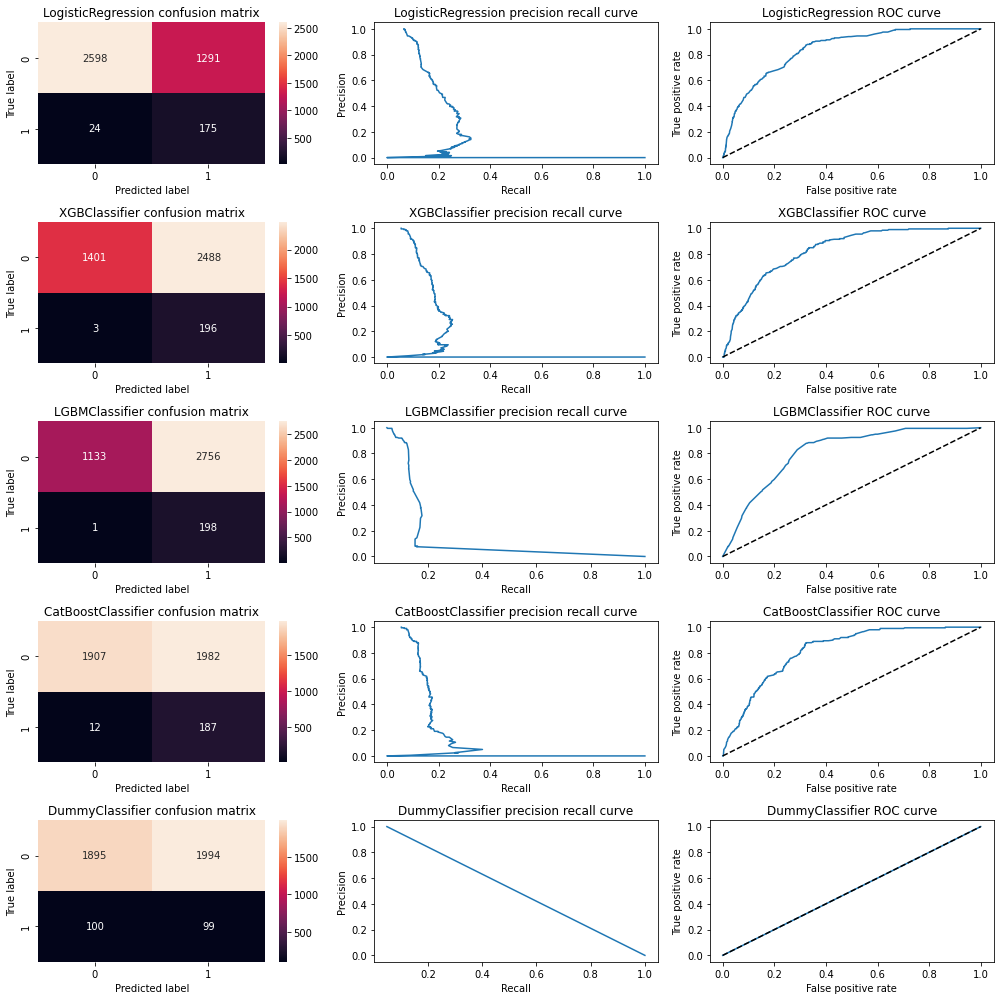

In [55]:
models = {name:model['clf'] for name, model in gs_res[1].items()}

models[d_clf.__class__.__name__] = d_clf

plot_cm_pr_roc_curves(
    models,
    preproc,
    X_train,
    y_train,
    plot_size=(14,14),
    cv_predict=True,
    folds=5,
    n_jobs=None
)

In terms of predicting the most patients with strokes LGBM seems to be doing a good job. Although, it is predicting a lot of false positives, because of that XGBoost good be a better option.

In [56]:
from sklearn.externals import joblib

model = gs_res[1]['XGBClassifier']
model.fit(X_train, y_train)

_ = joblib.dump(model, "stroke_xgb_clf.pkl")

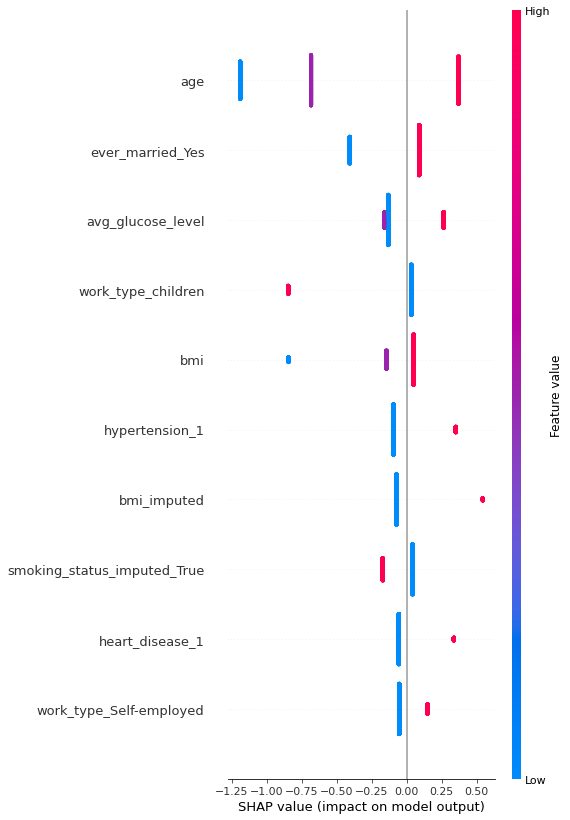

In [57]:
import shap

df = pd.DataFrame(preproc.transform(X_train), columns=bor_sel_cols)

explainer = shap.TreeExplainer(gs_res[1]['XGBClassifier']['clf'])

shap_vals = explainer.shap_values(df)

shap.summary_plot(shap_vals, df, plot_size=1)

From this shap value summary plot we can observe the importance and influence of each feature on the prediction. We can see that obviously age has the biggest impact. With lower age having negative impact on the outcome, but with higher age it becomes positive. We see similar relationship with average glucose level and bmi. Highest values of glucose level and bmi have a positive impact on the outcome, which would make sense that overweight/obese or diabetic people would get strokes more often. Also, with binary features such as marital status, hypertension, bmi imputed, heart disease, work type self-employed we see that positive values of these features have a positive impact on the outcome. There are also features with inverse relationship like work type children, smoking status imputed.

## Evaluation on the test set

Let's see how the models perform on the test set.

In [83]:
from sklearn.metrics import f1_score, recall_score, precision_score,\
roc_auc_score

X_test = test_df[features]
y_test = test_df.stroke

metrics_fcn = [f1_score, recall_score, precision_score, roc_auc_score]

results_dict = defaultdict(list)

for name, clf in models.items():
    clf_pl = Pipeline(steps=[('preproc', preproc), ('clf', clf)])

    clf_pl.fit(X_train, y_train)

    pred = clf_pl.predict(X_test)

    results_dict['model_name'].append(clf.__class__.__name__)

    for i, metric in enumerate(metrics[:-1]):
      results_dict[f'{metric}'].append(metrics_fcn[i](y_test, pred).round(3))

pd.DataFrame(results_dict)

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


,model_name,f1,recall,precision,roc_auc
0,LogisticRegression,0.190,0.76,0.109,0.720
1,XGBClassifier,0.130,0.96,0.070,0.651
2,LGBMClassifier,0.123,0.98,0.066,0.631
3,CatBoostClassifier,0.143,0.92,0.078,0.679
4,DummyClassifier,0.089,0.50,0.049,0.498


We see that auc decreased quite a bit, but recall and precision decreased only slightly.

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [0] during transform. These unknown categories will be encoded as al

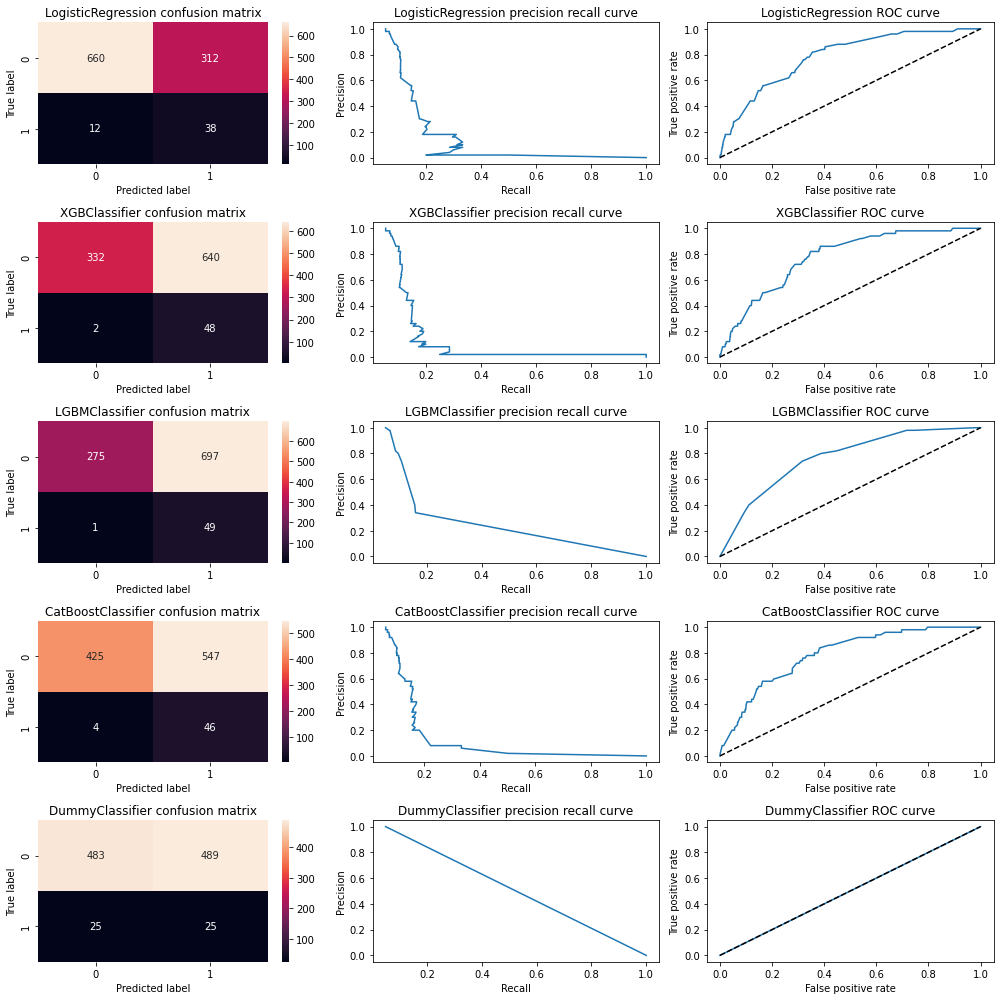

In [59]:
plot_cm_pr_roc_curves(
    models,
    preproc,
    X_train,
    y_train,
    test_X=X_test,
    test_y=y_test,
    plot_size=(14,14),
    cv_predict=False,
    n_jobs=None
)

Overall we see similar results as in previous confusion matrices and curves. LGBM and XGBoost classifies true positives quite well, but XGBoost classifies true negatives better. So XGBoost can be chosen as a final model.

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


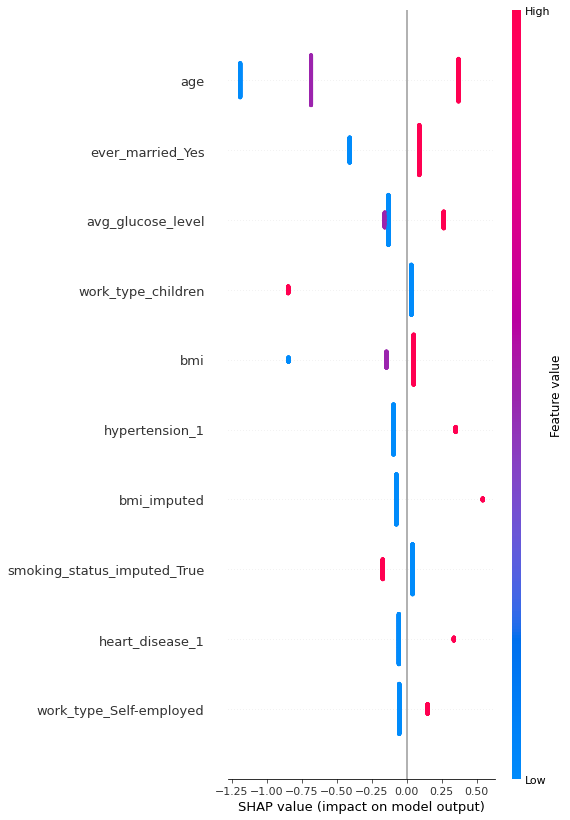

In [75]:
df = pd.DataFrame(preproc.transform(X_test), columns=bor_sel_cols)

explainer = shap.TreeExplainer(gs_res[1]['XGBClassifier']['clf'])

shap_vals = explainer.shap_values(df)

shap.summary_plot(shap_vals, df, plot_size=1)

The shap value summary plot shows the same thing as the earlier shap value plot.

## Summary

To summarize the work done, here are the main project insights and results:
- People with strokes are mostly over 40 year old.
- More people get strokes with higher average glucose level.
- There is a higher percentage of people that had strokes who have hypertension or heart disease.
- There is no statistical difference in stroke rates between males and females, but there is a statistical difference between married and single people.
- Judging by the trained model shap value summary plot the most important variables for stroke prediction are age, marital status, average glucose level, work type children, BMI, hypertension, BMI imputed, smoking status imputed, heart disease and work type self-employed.
- The final model chosen is XGBoost with the following results on the test set:
  - f1 - 0.13;
  - recall - 0.96;
  - precision - 0.07;
  - auc - 0.651;

**Suggestion for improvement**

Although we can classify all of the stroke cases almost perfectly, but this drasticly can increase the amount of false positves until there is basicly no use of model, if it classifies almost every case as positive. So if the requirement for false positives is known we can tune a more specific model.